# **Tarea 3 - Word Embeddings 📚**

**Integrantes:** Cristóbal Alcázar, Gianina Salomó

**Fecha límite de entrega 📆:** 16 de mayo.

**Tiempo estimado de dedicación:**


**Instrucciones:**
- El ejercicio consiste en:
    - Responder preguntas relativas a los contenidos vistos en los vídeos y slides de las clases.
    - Implementar el método de la Word Context Matrix. 
    - Entrenar Word2Vec y FastText sobre un pequeño corpus.
    - Evaluar los embeddings obtenidos en una tarea de clasificación.
- La tarea se realiza en grupos de **máximo** 2 personas. Puede ser invidivual pero no es recomendable.
- La entrega es a través de u-cursos a más tardar el día estipulado arriba. No se aceptan atrasos.
- El formato de entrega es este mismo **Jupyter Notebook**.
- Al momento de la revisión tu código será ejecutado. Por favor verifica que tu entrega no tenga errores de compilación. 


**Referencias**

Vídeos: 

- [Linear Models](https://youtu.be/zhBxDsNLZEA)
- [Neural Networks](https://youtu.be/oHZHA8h2xN0)
- [Word Embeddings](https://youtu.be/wtwUsJMC9CA)

## **Preguntas teóricas 📕 (3 puntos).** ##
Para estas preguntas no es necesario implementar código, pero pueden utilizar pseudo código.

### **Parte 1: Modelos Lineales (1.5 ptos)**

Suponga que tiene un dataset de 10.000 documentos etiquetados por 4 categorías: política, deporte, negocios y otros. 

**Pregunta 1**: Diseñe un modelo lineal capaz de clasificar un documento según estas categorías donde el output sea un vector con una distribución de probabilidad con la pertenencia a cada clase. 

Especifique: representación de los documentos de entrada, parámetros del modelo, transformaciones necesarias para obtener la probabilidad de cada etiqueta y función de pérdida escogida. **(0.75 puntos)**

**Respuesta**: 
$$
\newcommand{\vecthat}[1]{\vec{\hat{#1}}}
$$

Se diseña un modelo lineal de Regresión Logística para clasificación multiclase mediante aprendizaje supervisado:
- _Input_: Documento representado como un vector $\vec x$ _sparse_, de tipo "Bag of Words". Su dimensión $d_{in}$ corresponde al tamaño del vocabulario $V$.
- _Output_: Vector $\vecthat y$ de dimensionalidad $d_{out}=4$; Su dimensionalidad corresponde a la cantidad de clases.
- _Parámetros_: Matriz de pesos $W$ de dimensiones $d_{in} \times d_{out}$, y vector de sesgos $\vec b$ de dimensión $d_{out}$.

El modelo lineal se entrena a partir de un corpus de $k$ documentos vectorizados y etiquetados, y busca predecir la probabilidad de pertenencia de un documento a cada clase.

Durante el entrenamiento, los pesos de $W$ se ajustan mediante descenso de gradiente estocástico, de forma de disminuir la pérdida entregada por una _función de pérdida de entropía cruzada categórica_. Ésta calcula la diferencia entre la distribución de probabilidades de pertenencia a cada clase entregada por la predicción del modelo (obtenidas a partir de aplicar _softmax_ a la predicción del modelo), con la distribución real de probabilidades de clase (codificada como vector one hot).

La _transformación de softmax_ fuerza a que las salidas para cada elemento del vector $\vecthat y$ sean positivas, y sumen 1 entre ellas, para así tener una interpretación probabilística.

- Modelo: $\vecthat y = \text{softmax}(\vec x \cdot W + \vec b)$



**Pregunta 2**: Explique cómo funciona el proceso de entrenamiento en este tipo de modelos y su evaluación. **(0.75 puntos)**

**Respuesta**: 

### **Parte 2: Redes Neuronales (1.5 ptos)** 

Supongamos que tenemos la siguiente red neuronal.

![image.png](https://drive.google.com/uc?export=view&id=1nV1G0dOeVGPn40qGcGF9l_pVEFNtLU-w)

**Pregunta 1**: En clases les explicaron como se puede representar una red neuronal de una y dos capas de manera matemática. Dada la red neuronal anterior, defina la salida $\vec{\hat{y}}$ en función del vector $\vec{x}$, pesos $W^i$, bias $b^i$ y funciones $g,f,h$. 

Adicionalmente liste y explicite las dimensiones de cada matriz y vector involucrado en la red neuronal. **(0.75 Puntos)**

**Respuesta**: 



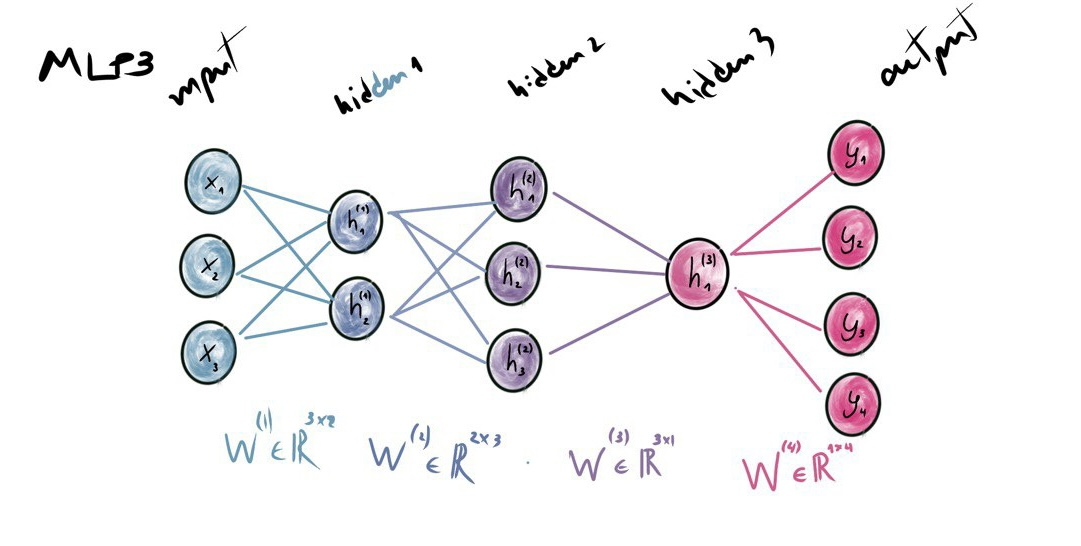

La formulación del MLP3 según la notación vista en clases se indica
en el diagrama de arriba. Se presentan las matrices con los parámetros
usadas para transformar los datos de capa en capa, se adjuntan las dimensiones
de cada matriz de parámetros, y recordar que también hay _biases_ pero no
aparecen en el diagrama. El super indice $i$ en $h^{(i)}$ indica la 
i-esima capa oculta.


* $\vec{x}=[x_1,x_2, x_3] \in \mathrm{R}^{1\times 3}$
* $\vec{\textbf{h}}^{(1)}=[h_1^{(1)}, h_2^{(1)}]~\in \mathrm{R}^{1\times 2}$
* $\vec{\textbf{h}}^{(2)}=[h_1^{(2)}, h_2^{(2)}, h_2^{(2)}]~\in \mathrm{R}^{1\times 3}$
* $\vec{\textbf{h}}^{(3)}=[h_1^{(3)}]~\in \mathrm{R}^{1\times 1}$
* $\vec{\hat{y}} =[y_1, y_2, y_3, y_4]~\in \mathrm{R}^{1\times 4}$
* Las funciones de activación aplicadas en cada capa oculta son $g^{(1)}, g^{(2)}$ y $g^{(3)}$
* Si bien en el diagrama de arriba se indican los parámetros $\textbf{W}^{(i)}$
y sus dimensiones, faltan los _biases_ para cada capa oculta $\vec{\text{b}}^{(i)}$, y tienen la misma dimensión que los vectores $\vec{\textbf{h}}^{(i)}$.

Es posible formular el vector de salida $\vec{\hat{y}}$ usando
la notación anterior en la siguiente expresión recursiva:



* $\vec{\textbf{h}}^{(1)} = \vec{x}\textbf{W}^{(1)} + \vec{\textbf{b}}^{(1)}$
* $\vec{\textbf{h}}^{(2)} = g^{(1)}\big(\vec{\textbf{h}}^{(1)}\big)\textbf{W}^{(2)} + \vec{\textbf{b}}^{(2)} = g^{(1)}\big(\vec{x}\textbf{W}^{(1)} + \vec{\textbf{b}}^{(1)}\big)\textbf{W}^{(2)} + \vec{\textbf{b}}^{(2)}$
* $\vec{\textbf{h}}^{(3)} = g^{(2)}\big(  \vec{\textbf{h}}^{(2)}\big)\textbf{W}^{(3)} + \vec{\textbf{b}}^{(3)} = g^{(2)} \big( g^{(1)}\big(\vec{x}\textbf{W}^{(1)} + \vec{\textbf{b}}^{(1)}\big)\textbf{W}^{(2)} + \vec{\textbf{b}}^{(2)} \big) \textbf{W}^{(3)}+\vec{\textbf{b}}^{(3)}$
* $
\vec{\hat{y}} = NN_{MLP3}(\vec{x}) = g^{(3)}\big(\vec{\textbf{h}}^{(3)}\big) \textbf{W}^{(4)} = g^{(3)}\big(
    g^{(2)} \big( g^{(1)}\big(\vec{x}\textbf{W}^{(1)} + \vec{\textbf{b}}^{(1)}\big)\textbf{W}^{(2)} + \vec{\textbf{b}}^{(2)} \big) \textbf{W}^{(3)}+\vec{\textbf{b}}^{(3)} 
  \big)\textbf{W}^{(4)}$

<br>

**Nota:** siguiendo la formulación en clases del MLP2 no se agrega el _bias_ en la última capa.

**Pregunta 2**: Explique qué es backpropagation. ¿Cuales serían los parámetros a evaluar en la red neuronal anterior durante backpropagation? **(0.25 puntos)**

**Respuesta**:

_Backpropagation_ es un caso especial de [diferenciación automática](https://en.wikipedia.org/wiki/Automatic_differentiation)
que utiliza la propiedad de la regla de la cadena del gradiente para
generar un [gráfico directo acíclico (aka DAG)](https://en.wikipedia.org/wiki/Directed_acyclic_graph) de derivadas parciales. De esta forma desacopla 
en variables intermedias una expresión anidada que se compone de
operaciones elementales, y
aplicadas de manera secuencial (e.g. `Xw -> Xw+b -> tanh(Xw+b)`), permitiendo
propagar hacía atras la información del gradiente según la contribución de cada variable intermedia al resultado final de dicha expresión anidada.

En el caso específico de la red neuronal, la "expresión anidada" es el valor de la función de costo o pérdida
que se calcula  con las predicciones computadas por el _forward pass_, la cual se obtiene de evaluar una secuencia de capas
lineales, funciones de activación, y otras operaciones (e.g. _batch normalization_), hasta llegar al valor escalar entregado
por la función de pérdida que mide el error de la predicción respecto
al _target_ o _ground truth_. En la respuesta anterior, el resultado del
_forward pass_ sería evaluar $\vec{\hat{y}} = NN_{MLP3}(\vec{x})$ dado
cierto estado de sus parámetros $\textbf{W}^{(i)}$.

Es posible utilizar _backpropagation_ para
computar la contribución del error realizado por cada párametro de la red, en
el diagrama anterior serían los $\textbf{W}^{(i)}$ más los _biases_, y luego
utilizar esa información por algún algoritmo de optimización basado en gradientes para ajustar los parámetros en la dirección que disminuye el error,
como por ejemplo lo hace el algoritmo de gradiente descendente y sus variantes (e.g. SGD). 

<br>
<br>

**Pregunta 3**: Explique los pasos de backpropagation. En la red neuronal anterior: Cuales son las derivadas que debemos calcular para poder obtener $\vec{\delta^l_{[j]}}$ en todas las capas? **(0.5 puntos)**

<br>

**Respuesta**:

Definimos $\vec{z}^{(\ell)}$ (aka activaciones), que será la entrada de la siguiente capa $\ell + 1$, como el vector con las unidades ocultas de $\ell$ una vez aplicada la función de activación (i.e. $g(\vec{h}^{(\ell)})$). Ademas,
definimos $\vec{\delta}^{(\ell)}$ como el vector de derivadas parciales de la función
de costo $L$ con respecto las unidades ocultas de la capa $\ell$. 

$$
\vec{\delta}^{(\ell)} = \frac{\partial L}{\partial \vec{h}^{(\ell)}}
$$

**Importante, $\vec{\delta}^{(\ell)}$ no hace referencia a las derivadas parciales de $L$ respecto a los parámetros $W^{(\ell)}$**. Estas derivadas parciales son las que finalmente búscamos calcular con _backpropagation_ para luego actualizar los parámetros, y continuar el entrenamiento o ajuste de la red.

Los pasos de backpropagation sin considerar su implementación vía diferenciación
automática (generación del grafo computacional DAG), son los siguientes:

1. Al aplicar _forward pass_ desde la entrada $\vec{x}$, para obtener las
activaciones, unidades ocultas, y la salida $\vec{\hat{y}}$. Luego,
computamos la función de costo usando la predicción y el valor real $L(\vec{\hat{y}}, \vec{y})$.
1. Computar $\vec{\delta^{(4)}}$  para todas las unidades de salida, en
este problema la capa $\ell=4$ es la capa de salida (ver diagrama). Estas
derivadas parciales son fáciles de computar porque su contribución es directa al error entregado por la función de costo $L$. Básicamente obtenemos
$\vec{\delta^{(4)}}$ al computar $\partial L / \partial \vec{\hat{y}}$ .
1. Luego, realizamos el _backward pass_ para propagar recursivamente hacía
atras $\vec{\delta}^{(\ell + 1)}_{[k]}$ usando la ecuación de abajo y obtener $\vec{\delta}^{(\ell)}_{[j]}$ para cada unidad oculta (o neurona)
de la red. Esto es necesario porque la contribución del error $L$ en las capas
intermedias y de entrada no son directas como la del output. La siguiente ecuación propaga la contribución del 
error que tuvo la unidad oculta $j$ de la capa $\ell$, en cada una de las
$k$ unidades ocultas de la capa siguiente ($\ell + 1$), ponderando según los pesos respectivo que las conectan (i.e. $W_{[j,k]}$):

<br>
$$
\delta^{(\ell)}_{[j]} = \delta'(h^{(\ell)}_{[j]}) \times \sum_{k}\ (\delta^{(\ell + 1)}_{[k]} \times W^{(\ell+1)}_{[j,k]})
$$

4. Una vez que la recursión llegue al caso base, la capa de entrada, tendremos 
todo lo necesario para computar las **derivadas parciales de $L$ respecto a los
parámetros de la red**. Recordar que en el _forward pass_ obtuvimos todos los calculos intermedios, incluyendo las activaciones $\vec{z}^{(\ell)}$, y en los dos pasos anteriores calculamos $\vec{\delta}^{(\ell)}$ para todas las
capas. Ahora solo debemos evaluar las siguientes expresiones en todos los niveles $\ell$ de la red usando la información anterior: 

$$
\frac{\partial L}{\partial W^{\ell}_{[i, j]}} = \vec{\delta}^{(\ell)}_{[j]} \times \vec{z}^{(\ell-1)}_{[i]}
$$
<br>
Con esta última información, podemos utilizar un algoritmo de optimización
basado en el primer gradiente (e.g. SGD), y actualizar los parámetros
$W^{(\ell)}$ en la dirección negativa de su contribución al error $\partial L / \partial W^{(\ell)}$. Moviendo los parámetros en cada iteración en la dirección
que disminuye nuestra función de pérdida o costo $L$.


## **Preguntas prácticas 💻 (3 puntos).** ##

### Parte 3 A (1 Punto): Word Contex Matrix



En esta parte debe crear una matriz palabra contexto, para esto, complete el siguiente template (para esta parte puede utilizar las librerías ```numpy``` y/o ```scipy```). Hint: revise como utilizar matrices sparse de ```scipy```

```python
class WordContextMatrix:

  def __init__(self, vocab_size, window_size, dataset, tokenizer):
    """
    Utilice el constructor para definir los parametros.
    """

    # se sugiere agregar un una estructura de datos para guardar las
    # palabras del vocab y para guardar el conteo de coocurrencia
    # si lo necesita puede agregar más parametros pero no puede cambiar el resto
    ...
    
  def build_vocab(self, word):
    """
    Utilice este método para construir el vocabulario
    """
    

    # Le puede ser útil considerar un token unk al vocab
    # para palabras fuera del vocab
    ...
  
  def build_matrix(self):
    """
    Utilice este método para crear la palabra contexto
    """
    ...

  def get_matrix(self):
    """
    Utilice este método para obtener la matriz palabra contexto. 
    """

    # se recomienda transformar la matrix a un diccionario de embedding.
    # por ejemplo {palabra1:vec1, palabra2:vec2, ...}
    ...

```

puede modificar los parámetros o métodos si lo considera necesario. Para probar la matrix puede utilizar el siguiente corpus.

```python
corpus = [
  "I like deep learning.",
  "I like NLP.",
  "I enjoy flying."
]
```

Obteniendo una matriz parecia a esta:

***Resultado esperado***: 

| counts   | I  | like | enjoy | deep | learning | NLP | flying | . |   
|----------|---:|-----:|------:|-----:|---------:|----:|-------:|--:|
| I        | 0  |  2   |  1    |    0 |  0       |   0 | 0      | 0|            
| like     |  2 |    0 |  0    |    1 |  0       |   1 | 0      | 0 | 
| enjoy    |  1 |    0 |  0    |    0 |  0       |   0 | 1      | 0 |
| deep     |  0 |    1 |  0    |    0 |  1       |   0 | 0      | 0 |  
| learning |  0 |    0 |  0    |    1 |  0       |   0 | 0      | 1 |          
| NLP      |  0 |    1 |  0    |    0 |  0       |   0 | 0      | 1 |
| flying   |  0 |    0 |  1    |    0 |  0       |   0 | 0      | 1 | 
| .        |  0 |    0 |  0    |    0 |  1       |   1 | 1      | 0 | 

``

Verifique si su matrix es igual a esta utilizando el corpus de ejemplo. Ojo que este es sólo un ejemplo, su algoritmo debe **generalizar** a otros ejemplos.

In [ ]:
# Cristóbal: mejorar las siguientes cosas acá
#   TODO:
#     - Inicialización de la clase 
#     - Agregar más test con assert
#     - Incluir parte de progamación defensiva para cambiar palabras
#       de texto que no se encuentran en corpus por token especial "unk"
import re 
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

class WordContextMatrix:

  def __init__(self, vocab_size, window_size, dataset, tokenizer):
    """
    Utilice el constructor para definir los parametros.
    """
    # se sugiere agregar un una estructura de datos para guardar las
    # palabras del vocab y para guardar el conteo de coocurrencia
    # si lo necesita puede agregar más parametros pero no puede cambiar el resto
    self.vocab = None
    self.vocab_size = vocab_size
    self.window_size = window_size
    self.corpus = dataset
    self.M = None

    self.tokenizer = tokenizer
    # separar punto de las palabras al final de las oraciones (i.e. learning. -> learning .)
    # aprovechar de crear una lista de lista para tener nocion de documento
    # necesario para contar a nivel de ventana
    self.corpus = [self.tokenizer(s) for s in self.corpus]

    
  def build_vocab(self, word=None, return_vocab=False):
    """
    Utilice este método para construir el vocabulario
    """
    # Construir vocabulario y actualizar largo del vocabulario
    #self.vocab = sorted(list(set([word for doc in self.corpus for word in doc[0].split()])))
    word_freq = {}

    for doc in self.corpus:
      for t in doc:
        if t in word_freq:
          word_freq[t] += 1
        else:
          word_freq[t] = 1

    # Se ordena tokens según su frecuencia
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    print(sorted_freq)

    # Se actualiza vocab size / tokens a seleccionar para vocab
    if self.vocab_size is None or len(sorted_freq) < self.vocab_size:
      self.vocab_size = len(sorted_freq)

    elif len(sorted_freq) >= self.vocab_size:
      sorted_freq = sorted_freq[:self.vocab_size]

    self.vocab = [tf[0] for tf in sorted_freq]
    print(self.vocab)

    # Le puede ser útil considerar un token <unk> al vocab
    # para palabras fuera del vocab
    self.vocab.append('<unk>')
    self.vocab_size += 1

    # Crear diccionario para mapear palabras a indices
    self.word2idx = {w:i for i, w in enumerate(self.vocab)}

    if return_vocab:
      return self.vocab, self.vocab_size

  
  def build_matrix(self):
    """
    Utilice este método para crear la palabra contexto
    """
    if self.vocab is None:
      self.build_vocab()

    # Crear matriz de contexto 
    self.M = np.zeros((self.vocab_size, self.vocab_size), dtype=np.int32)

    for doc in self.corpus:
      # representar cada documento en corpus según su índice en vocabulario -> word-to-index (wtoi)

      wtoi = [
          # Cuando self.vocab_size es < a #tokens corpus, se presentan unk
          self.word2idx.get(w, self.word2idx.get("<unk>"))
          for w in doc
      ]

      # iterar por el contenido de cada documento
      for idx, c in enumerate(wtoi):
        # c: indice de la palabra que consideramos como centro
        left_idx = idx - self.window_size if idx >= self.window_size else 0
        right_idx = len(wtoi) if (idx + self.window_size+1) > len(wtoi) else idx + self.window_size+1

        # capturamos las palabras outside a considerar como contexto
        outside = wtoi[left_idx:idx] + wtoi[idx + 1:right_idx]  

        # o: indices de palabras como contexto a considerar "afuera" (outside),
        #    según el tamaño de la ventana a considerar 
        for o in outside:
          self.M[c, o] += 1
    

  def get_matrix(self):
    """
    Utilice este método para obtener la matriz palabra contexto. 
    """

    # se recomienda transformar la matrix a un diccionario de embedding.
    # por ejemplo {palabra1:vec1, palabra2:vec2, ...}
    return pd.DataFrame(
        self.M, index=self.word2idx.keys(), columns=self.word2idx.keys()
    ).to_dict()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpus = [
  "I like deep learning.",
  "I like NLP.",
  "I enjoy flying."
]

context_matrix = WordContextMatrix(3, 1, corpus, word_tokenize)
context_matrix.build_matrix()
pd.DataFrame(context_matrix.get_matrix())

[('I', 3), ('.', 3), ('like', 2), ('deep', 1), ('learning', 1), ('NLP', 1), ('enjoy', 1), ('flying', 1)]
['I', '.', 'like']


,I,.,like,<unk>
I,0,0,2,1
.,0,0,0,3
like,2,0,0,2
<unk>,1,3,2,4


In [ ]:
context_matrix = WordContextMatrix(None, 1, corpus, word_tokenize)
context_matrix.build_matrix()
pd.DataFrame(context_matrix.get_matrix())

[('I', 3), ('.', 3), ('like', 2), ('deep', 1), ('learning', 1), ('NLP', 1), ('enjoy', 1), ('flying', 1)]
['I', '.', 'like', 'deep', 'learning', 'NLP', 'enjoy', 'flying']


,I,.,like,deep,learning,NLP,enjoy,flying,<unk>
I,0,0,2,0,0,0,1,0,0
.,0,0,0,0,1,1,0,1,0
like,2,0,0,1,0,1,0,0,0
deep,0,0,1,0,1,0,0,0,0
learning,0,1,0,1,0,0,0,0,0
NLP,0,1,1,0,0,0,0,0,0
enjoy,1,0,0,0,0,0,0,1,0
flying,0,1,0,0,0,0,1,0,0
<unk>,0,0,0,0,0,0,0,0,0


In [ ]:
context_matrix = WordContextMatrix(10, 1, corpus, word_tokenize)
context_matrix.build_matrix()
pd.DataFrame(context_matrix.get_matrix())

[('I', 3), ('.', 3), ('like', 2), ('deep', 1), ('learning', 1), ('NLP', 1), ('enjoy', 1), ('flying', 1)]
['I', '.', 'like', 'deep', 'learning', 'NLP', 'enjoy', 'flying']


,I,.,like,deep,learning,NLP,enjoy,flying,<unk>
I,0,0,2,0,0,0,1,0,0
.,0,0,0,0,1,1,0,1,0
like,2,0,0,1,0,1,0,0,0
deep,0,0,1,0,1,0,0,0,0
learning,0,1,0,1,0,0,0,0,0
NLP,0,1,1,0,0,0,0,0,0
enjoy,1,0,0,0,0,0,0,1,0
flying,0,1,0,0,0,0,1,0,0
<unk>,0,0,0,0,0,0,0,0,0


***Resultado esperado***: 

| counts   | I  | like | enjoy | deep | learning | NLP | flying | . |   
|----------|---:|-----:|------:|-----:|---------:|----:|-------:|--:|
| I        | 0  |  2   |  1    |    0 |  0       |   0 | 0      | 0|            
| like     |  2 |    0 |  0    |    1 |  0       |   1 | 0      | 0 | 
| enjoy    |  1 |    0 |  0    |    0 |  0       |   0 | 1      | 0 |
| deep     |  0 |    1 |  0    |    0 |  1       |   0 | 0      | 0 |  
| learning |  0 |    0 |  0    |    1 |  0       |   0 | 0      | 1 |          
| NLP      |  0 |    1 |  0    |    0 |  0       |   0 | 0      | 1 |
| flying   |  0 |    0 |  1    |    0 |  0       |   0 | 0      | 1 | 
| .        |  0 |    0 |  0    |    0 |  1       |   1 | 1      | 0 | 

``

### **Parte 3 B (1 Punto): Word Embeddings**

En la auxiliar 2 aprendieron como entrenar Word2Vec utilizando gensim. El objetivo de esta parte es comparar los embeddings obtenidos con dos modelos diferentes: Word2Vec y [FastText](https://radimrehurek.com/gensim/models/fasttext.html) (utilizen size=200 en FastText) entrenados en el mismo dataset de diálogos de los Simpson. 

In [ ]:
import re  
import pandas as pd 
from time import time  
from collections import defaultdict 
import string 
import multiprocessing
import os
import gensim
import sklearn
from sklearn.linear_model import LogisticRegression
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, classification_report

# word2vec
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.models.phrases import Phrases, Phraser
from sklearn.model_selection import train_test_split
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

Utilizando el dataset adjunto con la tarea:

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/alcazar90/CC6205-NLP/main/data/simpsons_dataset.csv"
)
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt'
).values

stopwords = Counter(stopwords.flatten().tolist())
df = df.dropna().reset_index(drop=True) # Quitar filas vacias
df.head(n=2)

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?


**Pregunta 1**: Ayudándose de los pasos vistos en la auxiliar, entrene los modelos Word2Vec y FastText sobre el dataset anterior. **(1 punto)** (Hint, le puede servir explorar un poco los datos)

**Respuesta**:

In [ ]:
print(f"Número de filas: {df.shape[0]}")

Número de filas: 131853


# de interacciones por personaje:



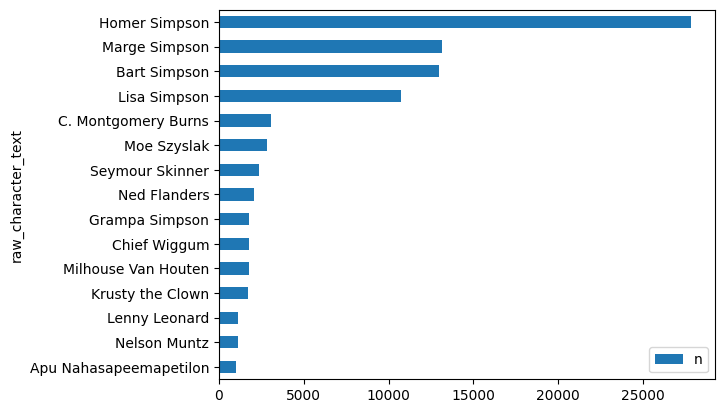

In [ ]:
print("# de interacciones por personaje:\n")

(df[['raw_character_text']]
  .groupby(by=['raw_character_text'])
  .value_counts()
  .sort_values(ascending=False)
  .reset_index()
  .rename(columns={0: "n"})
  .head(n=15)
  .sort_values(by=["n"])
  .plot
  .barh(x="raw_character_text", y="n")
);

In [ ]:
def simple_tokenizer(doc, lower=False):
    doc = doc.lower() if lower else doc

    tokenized_doc = doc.translate(
        str.maketrans('', '', string.punctuation + "«»“”‘’…—")
    ).split()

    tokenized_doc = [
        token
        for token in tokenized_doc
        if token.lower() not in stopwords
    ]
    return tokenized_doc

In [ ]:
cleaned_content = [
    simple_tokenizer(doc)
    for doc in df["spoken_words"].values
]

phrases = Phrases(cleaned_content, min_count=100, progress_per=5000) 
bigram = Phraser(phrases)
sentences = bigram[cleaned_content]

In [ ]:
%%time

# entrene modelo Word2Vec
simpsons_w2v = Word2Vec(min_count=10,
                      window=4,
                      vector_size=200,
                      sample=6e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      workers=multiprocessing.cpu_count())

simpsons_w2v.build_vocab(sentences, progress_per=10000)

simpsons_w2v.train(sentences, total_examples=simpsons_w2v.corpus_count,
                   epochs=5, report_delay=10)

simpsons_w2v.init_sims(replace=True)

<timed exec>:16: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).


CPU times: user 20.8 s, sys: 147 ms, total: 21 s
Wall time: 30 s


In [ ]:
%%time

# entrene modelo FastText utilizen size=200 en FastText
simpsons_ft = FastText(vector_size=200, window=3, min_count=1,
                       sentences=sentences, epochs=10)

CPU times: user 1min 34s, sys: 2.46 s, total: 1min 37s
Wall time: 1min 9s


**Pregunta 2**: Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge. Cúal es la diferencia entre ambos resultados? Por qué ocurre esto? Intente comparar ahora Liisa en ambos modelos (doble i). Cuando escogería uno vs el otro? **(0.5 puntos)**

**Respuesta**:

In [ ]:
palabras = ["Lisa", "Bart", "Homer", "Marge"]

In [ ]:
# Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge w2v
similares_w2v = pd.DataFrame([
    {
        "palabra_consulta": p,
        "palabra_cercana": s[0],
        "similaridad": s[1]
    }
    for p in palabras
    for s in simpsons_w2v.wv.most_similar(positive=[p])
])

similares_w2v.groupby(["palabra_consulta"]).agg({
    "palabra_cercana": "unique"
}).reset_index()

,palabra_consulta,palabra_cercana
0,Bart,"[winning, warned, Corporation, Chloe, voters, ..."
1,Homer,"[played, peoples, beast, Judge, Lords, mission..."
2,Lisa,"[rare, dedicated, Catholic, icy, supply, kitch..."
3,Marge,"[teens, special, income, finally, holiday, env..."


In [ ]:
# Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge ft
similares_ft = pd.DataFrame([
    {
        "palabra_consulta": p,
        "palabra_cercana": s[0],
        "similaridad": s[1]
    }
    for p in palabras
    for s in simpsons_ft.wv.most_similar(positive=[p])
])

similares_ft.groupby(["palabra_consulta"]).agg({
    "palabra_cercana": "unique"
}).reset_index()

,palabra_consulta,palabra_cercana
0,Bart,"[BartBart, Bartd, Lisa, BBart, Lisaaa, Lisasa,..."
1,Homer,"[HomerCo, Homerdo, Homerun, HomeIE, Homeo, Hom..."
2,Lisa,"[Bart, isa, Lisaaa, BartBart, Lisasa, BBart, B..."
3,Marge,"[withMarge, Margebot, Margie, Rarge, ListenIn,..."


**¿Cúal es la diferencia entre ambos resultados?**

La diferencia es que en el caso de _FastText_ las palabras más similares a las consultadas tienen una similitud morfológica con dicha palabra, mientras que en el caso de _Word2Vec_ no es así.

**¿Por qué ocurre esto?**

Esto ocurre porque _Word2Vec_ aprende representaciones vectoriales de palabras en función de su contexto en el corpus de texto, pero no considera las subpalabras o los morfemas en su representación. En cambio, _FastText_ se basa en _Word2Vec_ pero también considera las subpalabras y morfemas, descomponiendo las palabras en fragmentos más pequeños, y luego combinando los vectores aprendidos de las subpalabras para representar la palabra completa.

Por tanto, _FastText_ considera similares palabras que comparten raíces o subpalabras, ya que considera la información morfológica. En cambio, _Word2Vec_ considera similitudes semánticas entre las palabras.

In [ ]:
# Intente comparar ahora Liisa en ambos modelos (doble i)

def manage_similar(model, positive):
  try:
    return model.wv.most_similar(positive=positive)
  
  except KeyError as e:
    print(e, model)
    return [np.nan]


liisa_sim = pd.DataFrame([
    {
        "palabra_cercana": s[0] if isinstance(s, tuple) else s,
        "modelo": m
    }
    for m, ms in [
        ("Word2Vec", manage_similar(simpsons_w2v, ["Liisa"])),
        ("FastText", manage_similar(simpsons_ft, ["Liisa"])),
    ]
    for s in ms
]).groupby(["modelo"]).agg({
    "palabra_cercana": "unique"
}).reset_index()

liisa_sim

"Key 'Liisa' not present in vocabulary" Word2Vec<vocab=6503, vector_size=200, alpha=0.03>


,modelo,palabra_cercana
0,FastText,"[Zsa, cÃ³sa, isa, Pisa, Visa, Lisaaa, BBart, L..."
1,Word2Vec,[nan]


**¿Cuando escogería uno vs el otro?**

Para el caso de _Word2Vec_ no es posible encontrar una palabra similar, ya que la palabra consultada no se encuentra en el vocabulario obtenido a partir del corpus de entrenamiento.

Usaríamos _Word2Vec_ cuando el objetivo sea encontrar palabras similares en cuanto al contexto. Un posible ejemplo de aplicación puede ser el de "buscar sinónimos".

Usaríamos _FastText_ cuando el objetivo sea encontrar palabras similares en cuanto a su morfología. Un posible ejemplo de aplicación puede ser el de "buscar palabras similares a una palabra que puede tener errores ortográficos".

### **Parte 4 (1 Punto): Aplicar embeddings para clasificar**

Ahora utilizaremos los embeddings que acabamos de calcular para clasificar palabras basadas en su polaridad (positivas o negativas). 

Para esto ocuparemos el lexicón AFINN incluido en la tarea, que incluye una lista de palabras y un 1 si su connotación es positiva y un -1 si es negativa.

In [ ]:
df_afinn = pd.read_csv(
    "https://raw.githubusercontent.com/alcazar90/CC6205-NLP/main/data/AFINN_full.csv",
     sep='\t', header=None)

df_afinn.head(n=5)

,0,1
0,tops,1
1,groan,-1
2,perfects,1
3,spammer,-1
4,saluting,1


Hint: Para w2v son esperables KeyErrors debido a que no todas las palabras del corpus de los simpsons tendrán una representación en AFINN. Pueden utilizar esta función auxiliar para filtrar las filas en el dataframe que no tienen embeddings (como w2v no tiene token UNK se deben ignorar).

In [ ]:
def try_apply(model,word):
    try:
        aux = model[word]
        return True
    except KeyError:
        #logger.error('Word {} not in dictionary'.format(word))
        return False

**Pregunta 1**: Transforme las palabras del corpus de AFINN a la representación en embedding que acabamos de calcular (con ambos modelos). 

Su dataframe final debe ser del estilo [embedding, sentimiento], donde los embeddings corresponden a $X$ y el sentimiento asociado con el embedding a $y$ (positivo/negativo, 1/-1). 

Para ambos modelos, separar train y test de acuerdo a la siguiente función. **(0.75 puntos)**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1, stratify=y)
```

**Respuesta**:

#### Obtener embeddings usando `Word2Vec` (filtrar palabras no encontradas)

In [ ]:
print(f"# filas previo a filtrar: {df_afinn.shape[0]}")

# filas previo a filtrar: 3382


In [ ]:
mask = df_afinn[0].apply(lambda x: try_apply(simpsons_w2v.wv, x)) # la función try_apply recibe una palabra, no una fila
df_afinn_filter = df_afinn[mask]

# Primer dataframe es un work-around para desenvolver la columna que contiene 
# el vector de embeddings en tantas columnas como el largo de los embeddings
X_w2v, y_w2v = (pd.DataFrame(df_afinn_filter[0].apply(lambda x: simpsons_w2v.wv[x]).apply(pd.Series)), 
                df_afinn_filter[1])

In [ ]:
print(f"# filas posterior a filtrar palabras en simpsons_w2v: {df_afinn_filter.shape[0]}")
print(f"Dimensiones embeddings provenientes de Word2Vec: {X_w2v.shape}")

# filas posterior a filtrar palabras en simpsons_w2v: 851
Dimensiones embeddings provenientes de Word2Vec: (851, 200)


In [ ]:
print("Proporción de etiquetas:\n")
y_w2v.value_counts(normalize=True)

Proporción de etiquetas:



-1    0.585194
 1    0.414806
Name: 1, dtype: float64

#### Obtener embeddings usando `FastText`

In [ ]:
X_ft, y_ft = (pd.DataFrame(df_afinn[0].apply(lambda x: simpsons_ft.wv[x]).apply(pd.Series)),
              df_afinn[1])

In [ ]:
print(f"Dimensiones embeddings provenientes de FastText: {X_ft.shape}")

Dimensiones embeddings provenientes de FastText: (3382, 200)


In [ ]:
print("Proporción de etiquetas:\n")
y_ft.value_counts(normalize=True)

Proporción de etiquetas:



-1    0.652277
 1    0.347723
Name: 1, dtype: float64

#### Separación subsets

In [ ]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_w2v, y_w2v,random_state=0, test_size=0.1, stratify=y_w2v
)

X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
    X_ft, y_ft, random_state=0, test_size=0.1, stratify=y_ft
)

**Pregunta 2**: Entrenar una regresión logística (vista en auxiliar) y reportar accuracy, precision, recall, f1 y confusion_matrix para ambos modelos. Por qué se obtienen estos resultados? Cómo los mejorarías? **(0.75 puntos)**

#### Entrenamiento de modelos

In [ ]:
# Inicializar modelos de regresion para cada tipoo de embedding
clf_w2v = LogisticRegression(max_iter=int(1e6))
clf_ft = LogisticRegression(max_iter=int(1e6))

# Ajustar usando datasets con embeddings correspondientes
clf_w2v.fit(X_train_w2v, y_train_w2v)
clf_ft.fit(X_train_ft, y_train_ft)

LogisticRegression(max_iter=1000000)

#### Resultados

In [ ]:
y_pred_w2v = clf_w2v.predict(X_test_w2v)
conf_matrix_w2v = confusion_matrix(y_test_w2v, y_pred_w2v)
print("Matriz de confusión utilizando Word2Vect")
print(conf_matrix_w2v)

y_pred_ft = clf_ft.predict(X_test_ft)
conf_matrix_ft = confusion_matrix(y_test_ft, y_pred_ft)
print("\nMatriz de confusión utilizando FastText")
print(conf_matrix_ft)

Matriz de confusión utilizando Word2Vect
[[50  0]
 [36  0]]

Matriz de confusión utilizando FastText
[[215   6]
 [107  11]]


In [ ]:
print("Reporte de clasificación utilizando Word2Vec")
print(classification_report(y_test_w2v, y_pred_w2v))

Reporte de clasificación utilizando Word2Vec
              precision    recall  f1-score   support

          -1       0.58      1.00      0.74        50
           1       0.00      0.00      0.00        36

    accuracy                           0.58        86
   macro avg       0.29      0.50      0.37        86
weighted avg       0.34      0.58      0.43        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Reporte de clasificación utilizando FastText")
print(classification_report(y_test_ft, y_pred_ft))

Reporte de clasificación utilizando FastText
              precision    recall  f1-score   support

          -1       0.67      0.97      0.79       221
           1       0.65      0.09      0.16       118

    accuracy                           0.67       339
   macro avg       0.66      0.53      0.48       339
weighted avg       0.66      0.67      0.57       339



**Respuesta**:

(i) **¿Por qué se obtienen estos resultados?**

Los resultados obtenidos en general no son buenos, sobre todo para la clase _positiva_ (en especial en el caso de Word2Vec). Esto puede deberse a diversas causas, tales como:

* El corpus de los simpsons no es capaz de capturar el caso-uso de las 
palabras, debido a que el género de la serie y tipo de lenguaje utilizado en ella
no logra capturar la diversidad de uso de todas las palabras del idioma.
* Las dimensiones de los _embeddings_ (i.e. 200) podrían no son suficientes, requiriéndose en ese caso capturar estructuras más complejas que requieren mayor número
de dimensiones.
* Simplemente el corpus no es lo suficientemente vasto o variado para entrenar _embeddings_ que
sean de buena calidad (i.e. capturen el uso de las palabras).
* En específico, los malos resultados de _Word2Vec_ pueden deberse a un corpus de entrenamiento demasiado pequeño, ya que gran parte de los documentos de sentimiento debió eliminarse debido a que no se encontró representaciones de sus palabras en los embeddings creados.

(ii) **¿Cómo los mejorarías?**

Los resultados se pueden mejorar encontrando nuevos
features asociados a las palabras, o mejorando la calidad de estos.

* Se puede mejorar la calidad de los _embeddings_ utilizados pre entrenándolos
sobre un corpus de mayor tamaño que capture mejor la semántica y diversidad
del uso de las palabras.
* Se puede mejorar aumentando la cantidad de dimensiones de los _embeddings_
y obteniendo representaciones de mayor complejidad que capturen dinámicas
y casos de uso de las palabras de mejor forma.
* Se pueden obtener _features_ adicinales de formas clásicas, como la
cantidad de frecuencias que las palabras a clasificar aparecen sobre textos considerados "negativos" o "positivos".

# Bonus: +0.25 puntos en cualquier pregunta

**Pregunta 1**: Replicar la parte anterior utilizando embeddings pre-entrenados en un dataset más grande y obtener mejores resultados. Les puede servir [ésta](https://radimrehurek.com/gensim/downloader.html#module-gensim.downloader) documentacion de gensim **(0.25 puntos)**.

**Respuesta**:

Se repite el mismo ejercicio anterior pero utilizando _embeddings_ pre-entrenados con el algoritmo [GloVe](https://nlp.stanford.edu/pubs/glove.pdf).



Global Vector for Word Representation (aka GloVe) es un algoritmo no-supervisado
entrenado en estadísticas de co-ocurrencias de palabra-a-palabra dentro del contexto global de un corpus.

La idea de este algoritmo no-supervisado es que se entrena sobre distintos
corpus de texto para encontrar representaciones de palabras que luego
pueden ser utilizadsa para otras tareas, como la de este laboratorio de
clasificar la polaridad de las palabras.

Creamos una función para descargar y cargar _embeddings_ pre-entrenados
basados en GloVe, es posible descargar distintas versiones que dependen sobre
el corpus que fueron entrenadas dichas representaciones o _embeddings_:

In [ ]:
def load_glove_model(from_corpus="glove-wiki-gigaword-300"):
  """ Descarga y carga vectores pre-entrenados Glove.

      Retorna 400k de embeddings, cada uno de dimensión 200.
  """
  import gensim.downloader as api
  wv_from_bin = api.load(from_corpus)
  print("Tamaño del vocabulario %i" % len(list(wv_from_bin.index_to_key)))
  return wv_from_bin

Se puede descomentar el siguiente bloque de código para ver distintas
versiones de _embeddings_ pre-entrenados.

In [ ]:
print("Embedding pre-entrenados disponibles para descargar:\n")
#import gensim.downloader as api
#api.info()

Embedding pre-entrenados disponibles para descargar:



In [ ]:
%%time
# ------ esta celda se demora - descarga 256/376.1 MB con los embeddings pre-entrenados de GloVe ------
wv_from_glove = load_glove_model()

[==================================================] 100.0% 376.1/376.1MB downloaded
Tamaño del vocabulario 400000


In [ ]:
ex_emb = wv_from_glove.get_vector('skate')
print(f"Verificar dimensión del embedding: {ex_emb.shape}")
assert ex_emb.shape[0] == 300

Verificar dimensión del embedding: (300,)


Ocuparemos la misma estrategia de la sección anterior
para filtrar del corpus de palabras las que no
cuenten con una representación dentro de los _embeddings_
GloVe pre-entrenados.

In [ ]:
mask = df_afinn[0].apply(lambda x: try_apply(wv_from_glove, x))
df_afinn_filter = df_afinn[mask]
df_afinn_filter.shape

(3225, 2)

Ahora obtenemos la _feature matrix_ con los _embeddings_ pre-entrenados de GloVe.

In [ ]:
X_glove, y_glove = (
    pd.DataFrame(
        df_afinn_filter[0].apply(
            lambda x: wv_from_glove.get_vector(x)
        ).apply(pd.Series)
    ),
    df_afinn_filter[1]
)

In [ ]:
print(X_glove.shape, y_glove.shape)

(3225, 300) (3225,)


De manera similar al ejercicio anterior, separamos los datos en conjunto
de entrenamiento y prueba:

In [ ]:
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(
    X_glove, y_glove, random_state=0, test_size=0.1, stratify=y_glove
)

Entrenamos una regresión logistica sobre los datos utilizando la misma configuración del ejercicio anterior.

In [ ]:
clf_glove = LogisticRegression(max_iter=int(1e6))
clf_glove.fit(X_train_glove, y_train_glove)

LogisticRegression(max_iter=1000000)

Computamos las predicciones del modelo sobre el conjunto
de pruebas y calculamos las métricas.

In [ ]:
print("Matriz de confusión para GloVe")
y_pred_glove = clf_glove.predict(X_test_glove)
conf_matrix = confusion_matrix(y_test_glove, y_pred_glove)
print(conf_matrix)

Matriz de confusión para GloVe
[[198  13]
 [ 15  97]]


In [ ]:
print("Reporte de clasificación para GloVe")
print(classification_report(y_test_glove, y_pred_glove))

Reporte de clasificación para GloVe
              precision    recall  f1-score   support

          -1       0.93      0.94      0.93       211
           1       0.88      0.87      0.87       112

    accuracy                           0.91       323
   macro avg       0.91      0.90      0.90       323
weighted avg       0.91      0.91      0.91       323



Dos conclusiones de este ejercicio:

1. La idea poderosa de usar modelos no-supervisados entrenados para obtener representaciones complejas y de calidad que luego pueden ser
adaptadas a otras tareas como la de clasificación. 
2. El algoritmo GloVe, y el corpus en cual fueron entrenados los
_embeddings_ usados, fueron capaces de obtener mejores representaciones
y con eso subir de un _accuracy_ de 0.67 usando las representaciones
entrenadas con FastText sobre el corpus de los Simpsons, a lograr
un _accuracy_ de 0.91 usando un corpus de mejor calidad, mayor tamaño,
y un mejor algoritmo como GloVe vs Word2Vec.